# Importing and loading data

In [167]:
#importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style
style.use("dark_background")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  

In [168]:
# reading the data from csv file using pandas
data = pd.read_csv("C:/Users/Animkush/Desktop/Practice/data/StudentData.csv")

In [169]:
data.head(5) #printing first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [170]:
data.info() #helps us to see if there is any null values and data type of inputs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


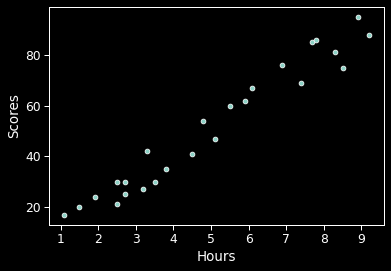

In [171]:
#using seaborn to see how data poins are scattered on the graph.
sb.scatterplot(data["Hours"], data["Scores"])

# Preparing the data for training and testing

In [172]:
X = np.array(data["Hours"]).reshape(-1, 1) # changing the shape of array using numpy so that it can be further processed.
y = data["Scores"]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorith on given Data

In [174]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training Done")

Training Done


In [175]:
# this is the regression line
regline = reg.coef_ * X + reg.intercept_ 

Text(0, 0.5, 'Scores')

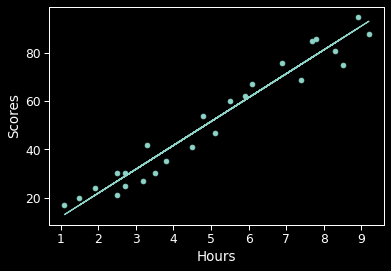

In [176]:
#plotting the regline with scattered points
plt.scatter(X, y)
plt.plot(X, regline)
plt.xlabel("Hours")
plt.ylabel("Scores") 

# Prediction/ Testing

In [177]:
pred = reg.predict(X_test)

In [178]:
predf = pd.DataFrame({"Actual Values" : y_test, "Predicted" : pred})

In [179]:
predf

,Actual Values,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [180]:
#checking our custom value
hour = np.array([9.25]).reshape(-1, 1)
own = reg.predict(hour)
print("Predicted Score when Hours Studied are 9.25 is", own[0],"%")

Predicted Score when Hours Studied are 9.25 is 93.69173248737538 %


In [181]:
#seeing how much is the error in predictions vs actual values using MAE
print("Mean Absoulte Error ", metrics.mean_absolute_error(y_test, pred))

Mean Absoulte Error  4.183859899002975


# Drawing Regression line using Seaborn

Using Seaborn


(0.0, 10.0)

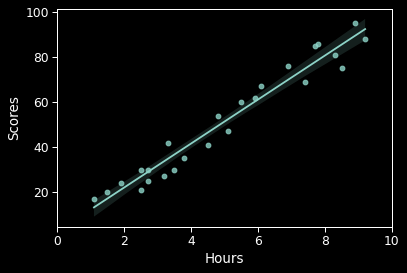

In [182]:
#we can also draw seaborn to draw this line using regplot code.
print("Using Seaborn")
sb.set_context("paper", font_scale=1.4) 
sb.regplot(x="Hours", y="Scores", data=data)
ax = plt.gca()
ax.set_xlim((0,10))  #fitting into axis